## EfficientNet

In [24]:
#!c1.4
import os
import zipfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from data_prepare.dataset_tools import extract_zip_with_cleanup, prepare_and_save_data
from data_prepare.f1score import F1Score

import pandas as pd
import matplotlib.pyplot as plt

from data_prepare.dataset_tools import extract_zip_with_cleanup, prepare_and_save_data
from data_prepare.plots import plot_history, confusion_matrix_plot, roc_plot, precision_recall_plot, CommonPlot
from data_prepare.models import ModelType, NetFineTunedModel, PersistModel, NetPureModel
from data_prepare.loaders import NetDataLoader

In [15]:
IMAGE_ARCHIVE_PATH="data/celeb/v1/"
IMAGES_DS="/dataset"
MODELS_DIR = "models"
RESULTS_DIR = "results"
MODEL_TYPE=ModelType.EFFICIENTNET
DATASET_OUTPUT_DIR='data/dataset'
LEARNING_RATE=1e-4
FEATURE_DIM=512
print('Done')

Done


In [11]:
data_loader = NetDataLoader(IMAGE_ARCHIVE_PATH)
train_gen, val_gen, test_gen = data_loader.load_genrators()
print("Done", train_gen, val_gen, test_gen)

data/celeb/v1/fake data/celeb/v1/real
data/dataset/net/train data/dataset/net/val data/dataset/net/test
Found 112 images belonging to 2 classes.
Found 1944 images belonging to 2 classes.
Found 1946 images belonging to 2 classes.

Class indices: {'fake': 0, 'real': 1}
Train samples: 112
Validation samples: 1944
Test samples: 1946
Done <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x317eaec90> <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x107b547a0> <keras.src.legacy.preprocessing.image.DirectoryIterator object at 0x31682a360>


## 1. Pure model

In [17]:
net_pure_model = PersistModel(NetPureModel(MODELS_DIR, RESULTS_DIR))

NetPure model run
Pure model run


In [18]:
_, pure_history = net_pure_model.fit(train_gen, val_gen, 1)

Persist fitting run
Pure fitting run
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - auc: 0.7051 - loss: 0.5191 - precision: 0.2502 - recall: 0.6646

4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - auc: 0.7288 - loss: 0.4916 - precision: 0.2561 - recall: 0.6590 - val_auc: 0.4920 - val_loss: 0.9906 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [19]:
net_pure_model._model.load_trained_model()

In [21]:
y_pred = net_pure_model.predict(test_gen)

61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step


#### Analyze result

results/netpure/y_pred.csv
results/netpure/history.csv


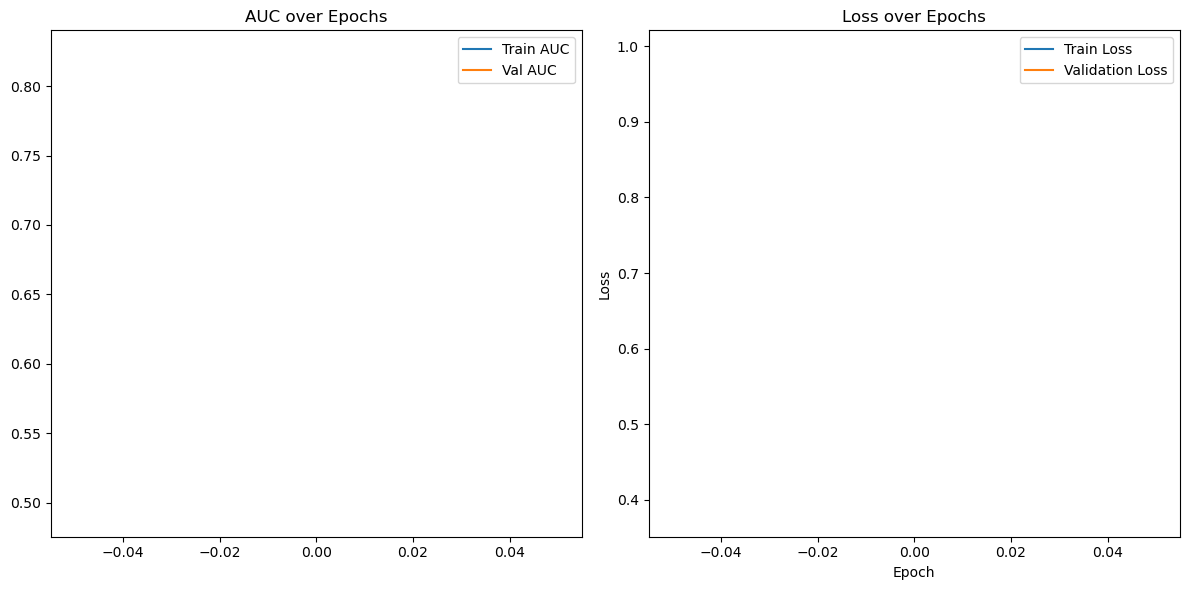

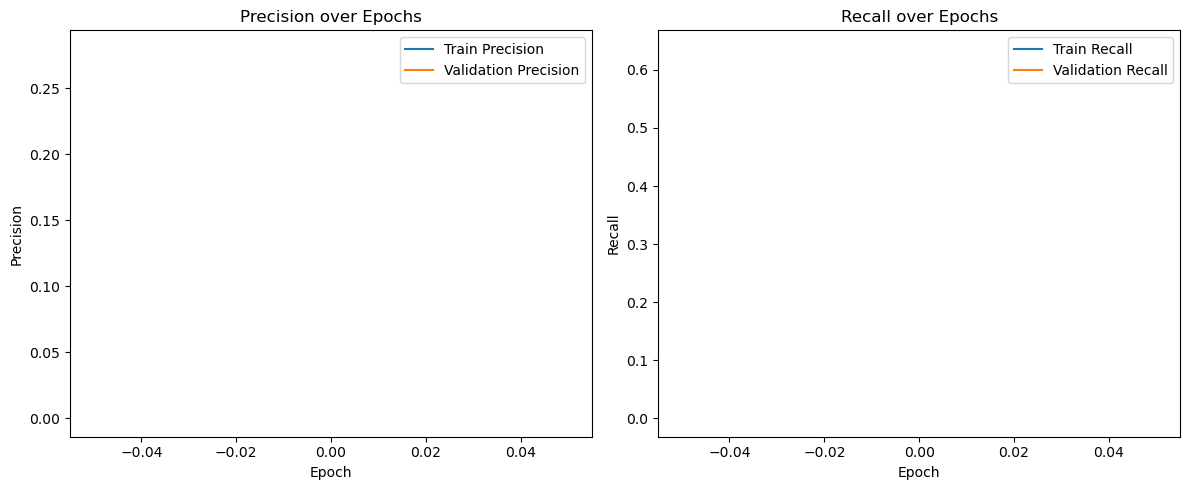

<Figure size 640x480 with 0 Axes>

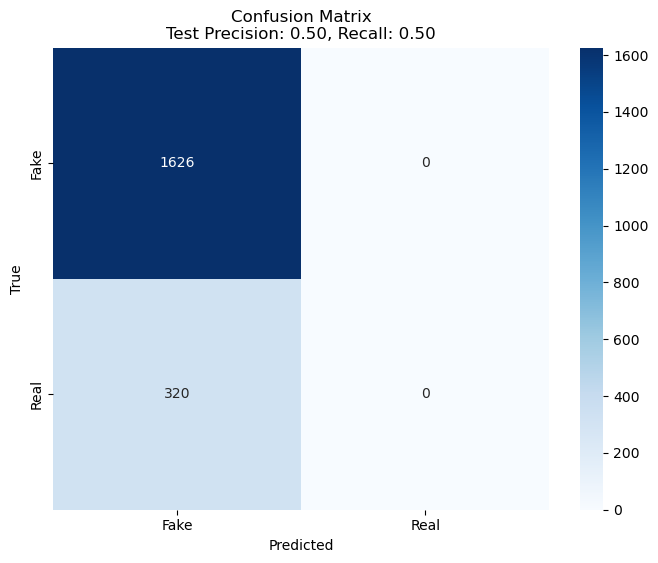

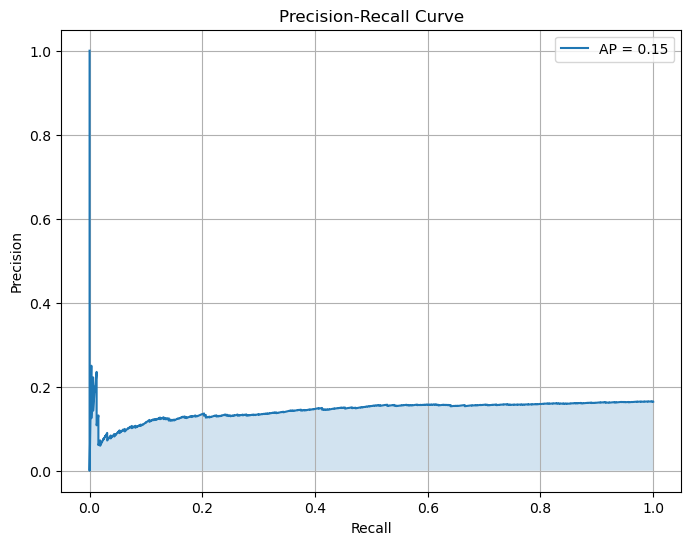

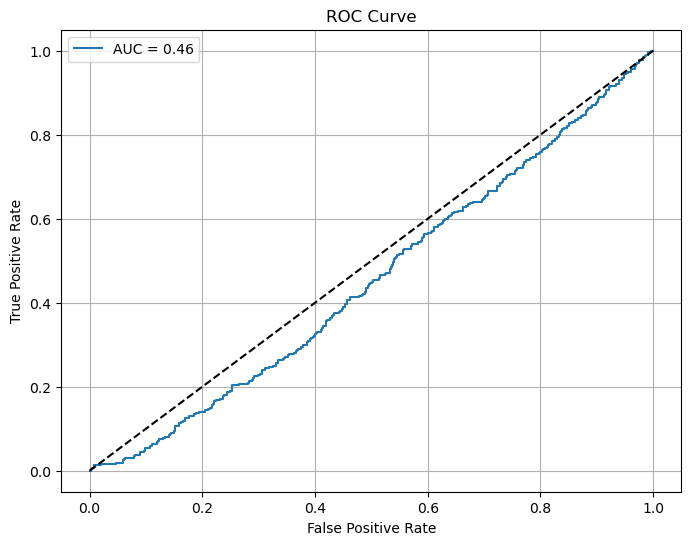

In [26]:
plots = CommonPlot(net_pure_model)
y, y_ = plots.plot(test_gen)

## 2. Finetune model

### Подготовка данных

In [12]:
data_loader = NetDataLoader(IMAGE_ARCHIVE_PATH)
train_gen, val_gen, test_gen = data_loader.load_genrators(DATASET_OUTPUT_DIR)
print("Done")

data/celeb/v1/fake data/celeb/v1/real
data/dataset/net/train data/dataset/net/val data/dataset/net/test
Found 5663 images belonging to 2 classes.
Found 1213 images belonging to 2 classes.
Found 1215 images belonging to 2 classes.

Class indices: {'fake': 0, 'real': 1}
Train samples: 5663
Validation samples: 1213
Test samples: 1215
Done


In [5]:
finetune = NetFineTunedModel(MODELS_DIR)
finetune_model, finetune_history = finetune.fit(train_gen, val_gen, 3, 7)

Epoch 1/3


/Users/aleksandr/opt/anaconda3/envs/deepfakedetection/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - auc: 0.5730 - loss: 1.0176 - precision: 0.1170 - recall: 0.7960

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - auc: 0.5852 - loss: 0.9727 - precision: 0.1222 - recall: 0.7641 - val_auc: 0.5474 - val_loss: 0.5362 - val_precision: 0.2857 - val_recall: 0.0564
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - auc: 0.8731 - loss: 0.3577 - precision: 0.4333 - recall: 0.8101 - val_auc: 0.5175 - val_loss: 0.5016 - val_precision: 0.1622 - val_recall: 0.0188
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - auc: 0.9619 - loss: 0.2698 - precision: 0.6417 - recall: 0.8087 - val_auc: 0.4956 - val_loss: 0.4810 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - auc: 0.8740 - loss: 0.2534 - precision: 0.6661 - recall: 0.7999

4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - auc: 0.8772 - loss: 0.2538 - precision: 0.6395 - recall: 0.7854 - val_auc: 0.4943 - val_loss: 0.4810 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - auc: 0.9220 - loss: 0.2646 - precision: 0.6196 - recall: 0.7568

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - auc: 0.9221 - loss: 0.2564 - precision: 0.6188 - recall: 0.7509 - val_auc: 0.4961 - val_loss: 0.4808 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - auc: 0.9404 - loss: 0.2144 - precision: 0.6528 - recall: 0.4347

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9324 - loss: 0.2206 - precision: 0.6111 - recall: 0.4205 - val_auc: 0.4975 - val_loss: 0.4807 - val_precision: 0.1250 - val_recall: 0.0063
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - auc: 0.9575 - loss: 0.1930 - precision: 0.5919 - recall: 0.6066

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9562 - loss: 0.1931 - precision: 0.5826 - recall: 0.5944 - val_auc: 0.5003 - val_loss: 0.4807 - val_precision: 0.1000 - val_recall: 0.0063
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - auc: 0.9299 - loss: 0.2009 - precision: 0.6493 - recall: 0.5627

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9232 - loss: 0.2057 - precision: 0.6306 - recall: 0.5411 - val_auc: 0.5026 - val_loss: 0.4807 - val_precision: 0.0870 - val_recall: 0.0063
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - auc: 0.9445 - loss: 0.2295 - precision: 0.5154 - recall: 0.4657

KeyboardInterrupt: 

In [29]:
finetune_history_df = pd.DataFrame(finetune_histories.history)
history_df.to_csv(RESULTS_DIR + '/finetune_training_history.csv', index=False)

NameError: name 'pd' is not defined

In [ ]:
# efficientnet_model_dir = os.path.join(MODELS_DIR, 'efficientnet_finetune_deepfake_model.h5')
# finetune_model.save(efficientnet_model_dir)

In [4]:
finetune = NetFineTunedModel(MODELS_DIR)

In [6]:
finetune.load_trained_model()

TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'block1a_dwconv', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_out', 'distribution': 'truncated_normal', 'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

In [13]:
y_pred = finetune_model.predict(test_gen)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv(RESULTS_DIR + '/y_pred.csv', index=False)

NameError: name 'finetune_trained_model' is not defined

### Analyze results for finetuned model

In [14]:
y_pred = pd.read_csv('results/net/y_pred.csv')
y_true = test_gen.labels

In [15]:
finetune_loaded_history_df = pd.read_csv('results/finetune_training_history.csv')
finetune_loaded_history = {'history': finetune_loaded_history_df.to_dict()}

In [16]:
confusion_matrix_plot(y_pred, y_true, 0.5, 0.5)

ValueError: Found input variables with inconsistent numbers of samples: [1215, 1946]

## 3. Pure model with V2 dataset

In [ ]:
data_loader = NetDataLoader(IMAGE_ARCHIVE_PATH)
train_gen, val_gen, test_gen = data_loader.load_genrators()
print("Done", train_gen, val_gen, test_gen)